In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import plotly.express as px
import math
pd.set_option('display.float_format', '{:.2f}'.format)
Data = pd.read_csv("survey_results_public.csv")

In [63]:
Data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.00
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.00
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.00
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.00


In [64]:
Data = Data.dropna(subset=["DevType"]) 

In [65]:
Data.drop(["SurveyLength","SurveyEase","Frequency_1","Frequency_2","Frequency_3", "TimeSearching", "TimeAnswering", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI","TBranch",
"Knowledge_1","Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", "Knowledge_8"
],axis=1,inplace=True)

In [66]:
Data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,ICorPM,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,People manager,10.00,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.00
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,Individual contributor,23.00,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.00
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,Individual contributor,7.00,Automated testing;Continuous integration (CI) ...,NaN,156000.00
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,Individual contributor,6.00,Microservices;Automated testing;Observability ...,Other,23456.00
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,Individual contributor,22.00,DevOps function;Microservices;Observability to...,Other,96828.00


In [67]:
#creaing a function to seperate the unique names from all the rows into a list
def seperate(all_list):
    listing = []
    for l in all_list:
        if isinstance(l,str):
            a=l.split(";")
            for j in a:
                if j not in listing and isinstance(j,str):
                    listing.append(j)
    return listing





In [68]:
#creating a dictionery of programming languages that people know with their counts 
Alllanguages = Data["LanguageHaveWorkedWith"].tolist()

languages= seperate(Alllanguages)
LangDict = {}
for i in languages:
    LangDict[i] = Data["LanguageHaveWorkedWith"].str.contains(i, na=False).sum()




C:\Users\samue\AppData\Local\Temp\ipykernel_29804\2862492565.py:7: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



In [69]:
#creating a dictionery of programming languagesthat people want to learn or work with and the number of instances
Alllanguages_want = Data["LanguageWantToWorkWith"].tolist()

languages_want = seperate(Alllanguages_want)
LangDict_want = {}
for i in languages_want:
    LangDict_want[i] = Data["LanguageWantToWorkWith"].str.contains(i, na=False).sum()

C:\Users\samue\AppData\Local\Temp\ipykernel_29804\1708164275.py:7: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Text(0.5, 1.0, 'Languages Have worked with')

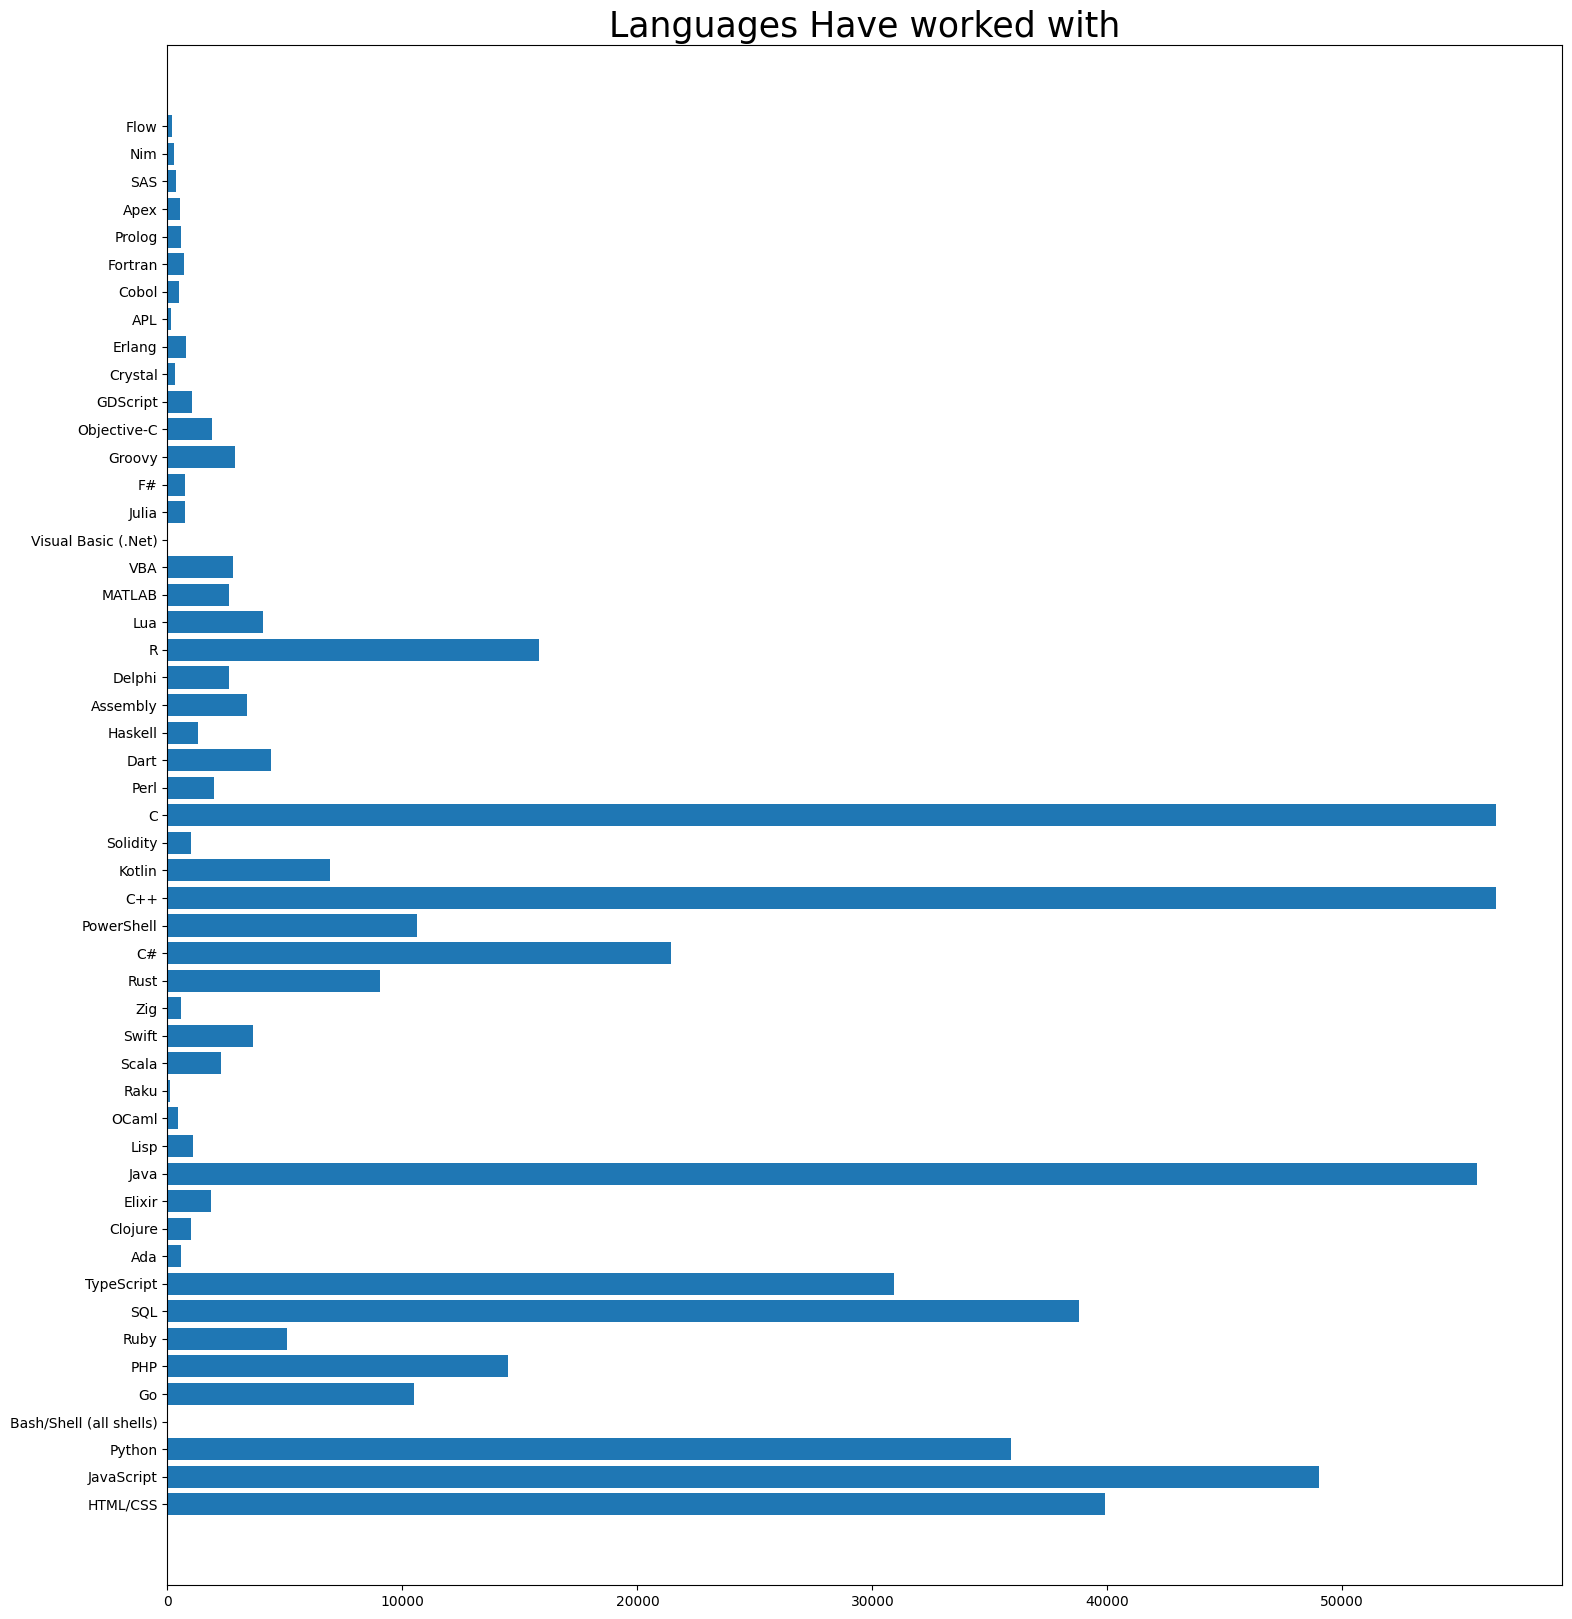

In [70]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
# fig, axes = plt.subplots(2, 1)

plt.rcParams["figure.figsize"] = (18,20)

plt.barh(list(LangDict.keys()), list(LangDict.values()),align='center')

plt.title('Languages Have worked with', fontsize = 25)
# plt.yticks(range(len(LangDict)), list(LangDict.keys()))

# figure(num=None, figsize=(30,25), dpi=80, facecolor='w', edgecolor='r')
# sns.barplot(y=list(LangDict.keys()),x=list(LangDict.values()))
# plt.xticks(rotation=90)
# plt.show()

Text(0.5, 1.0, 'Languages want to work with')

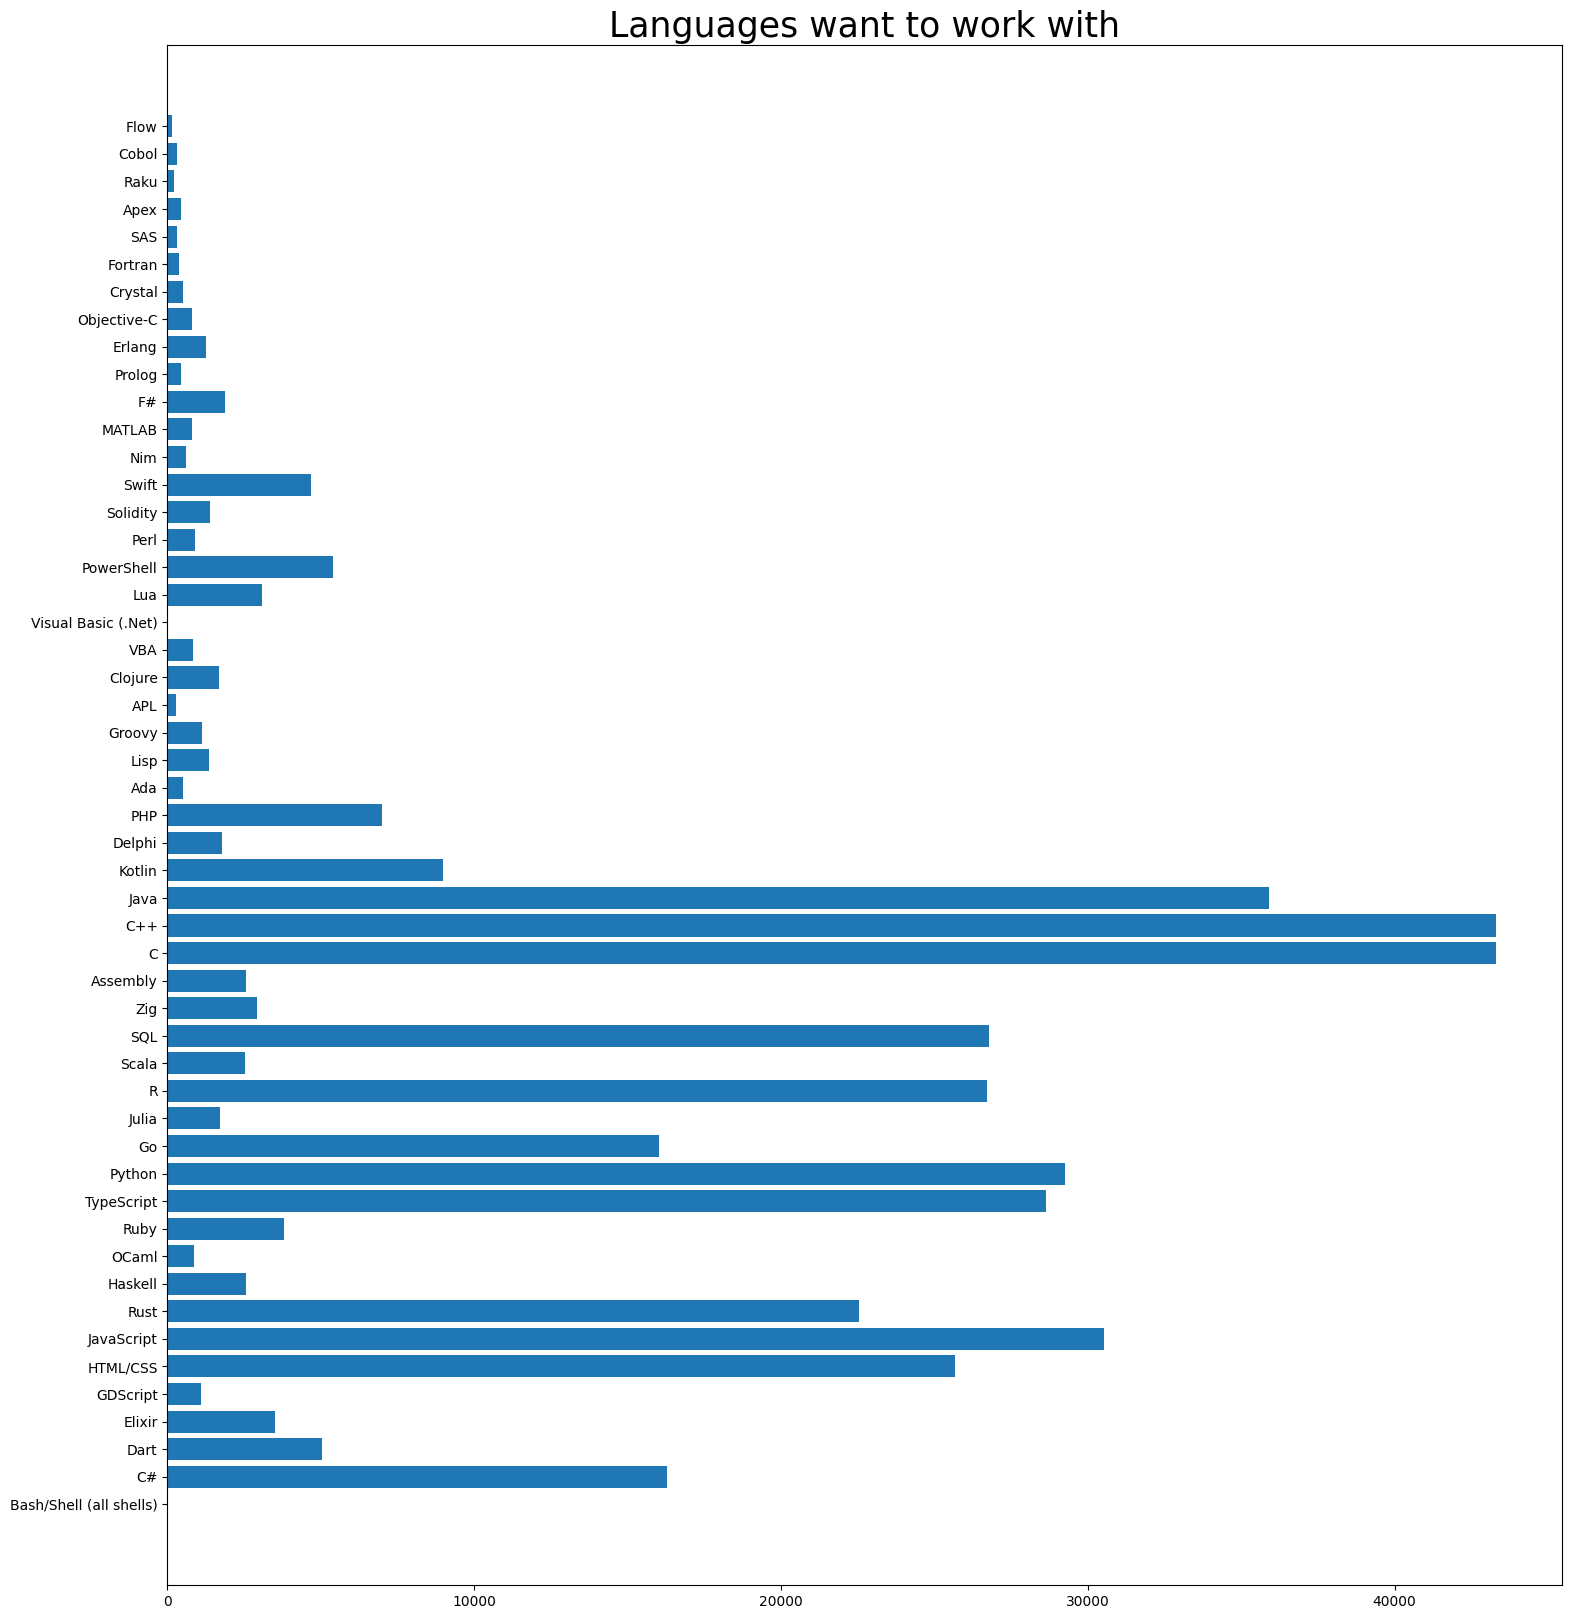

In [71]:
plt.barh(list(LangDict_want.keys()), list(LangDict_want.values()),align='center')
plt.title('Languages want to work with', fontsize = 25)

Text(0.5, 1.0, 'Webframe have worked with')

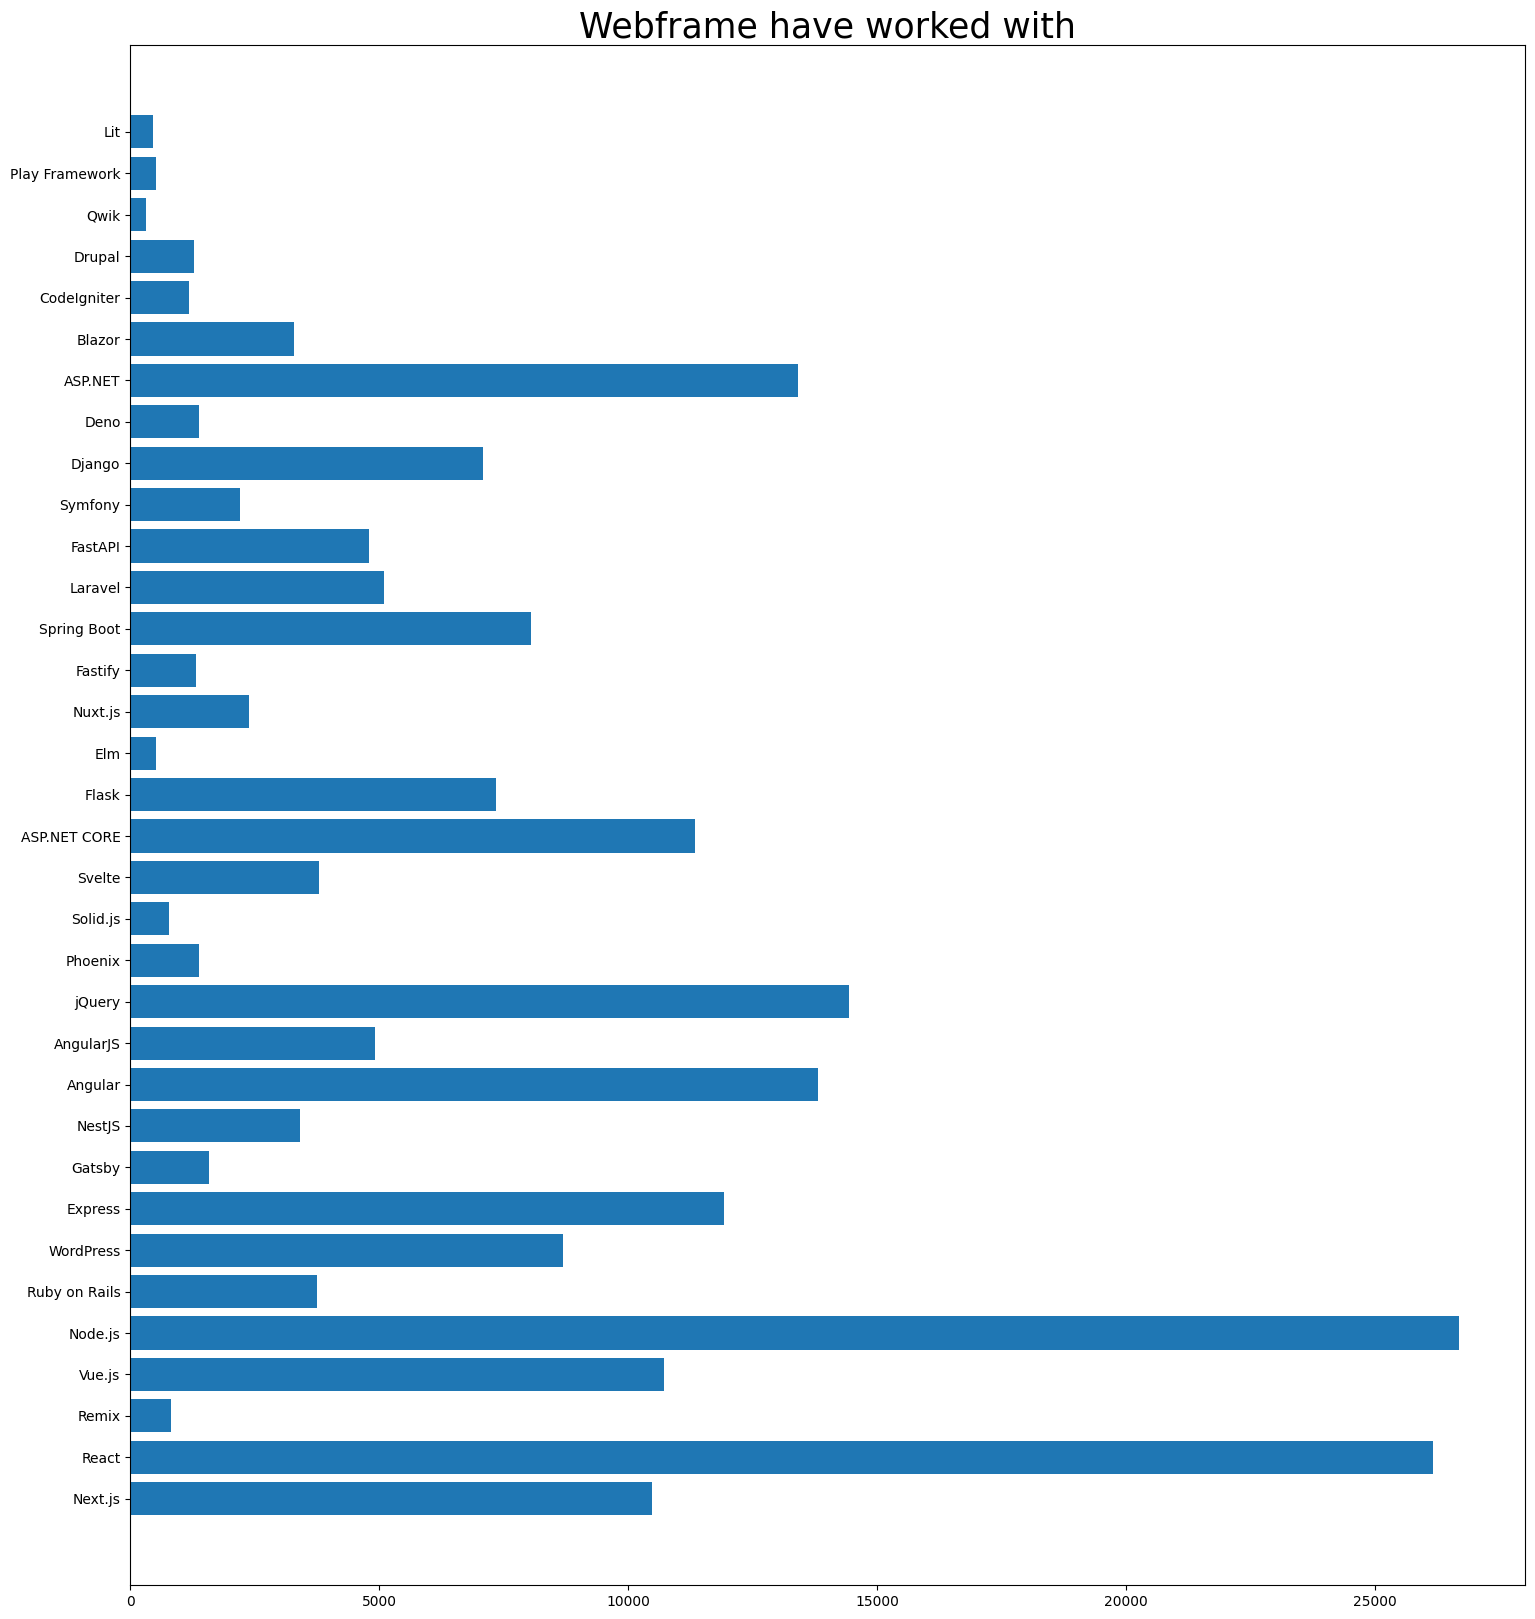

In [72]:
All_Webframe = Data["WebframeHaveWorkedWith"].tolist()

webframe= seperate(All_Webframe)
WebDict = {}
for i in webframe:
    WebDict[i] = Data["WebframeHaveWorkedWith"].str.contains(i, na=False).sum()

plt.rcParams["figure.figsize"] = (18, 20)

plt.barh(list(WebDict.keys()), list(WebDict.values()),align='center')
plt.title('Webframe have worked with', fontsize = 25)


Text(0.5, 1.0, 'Webframe want to work with')

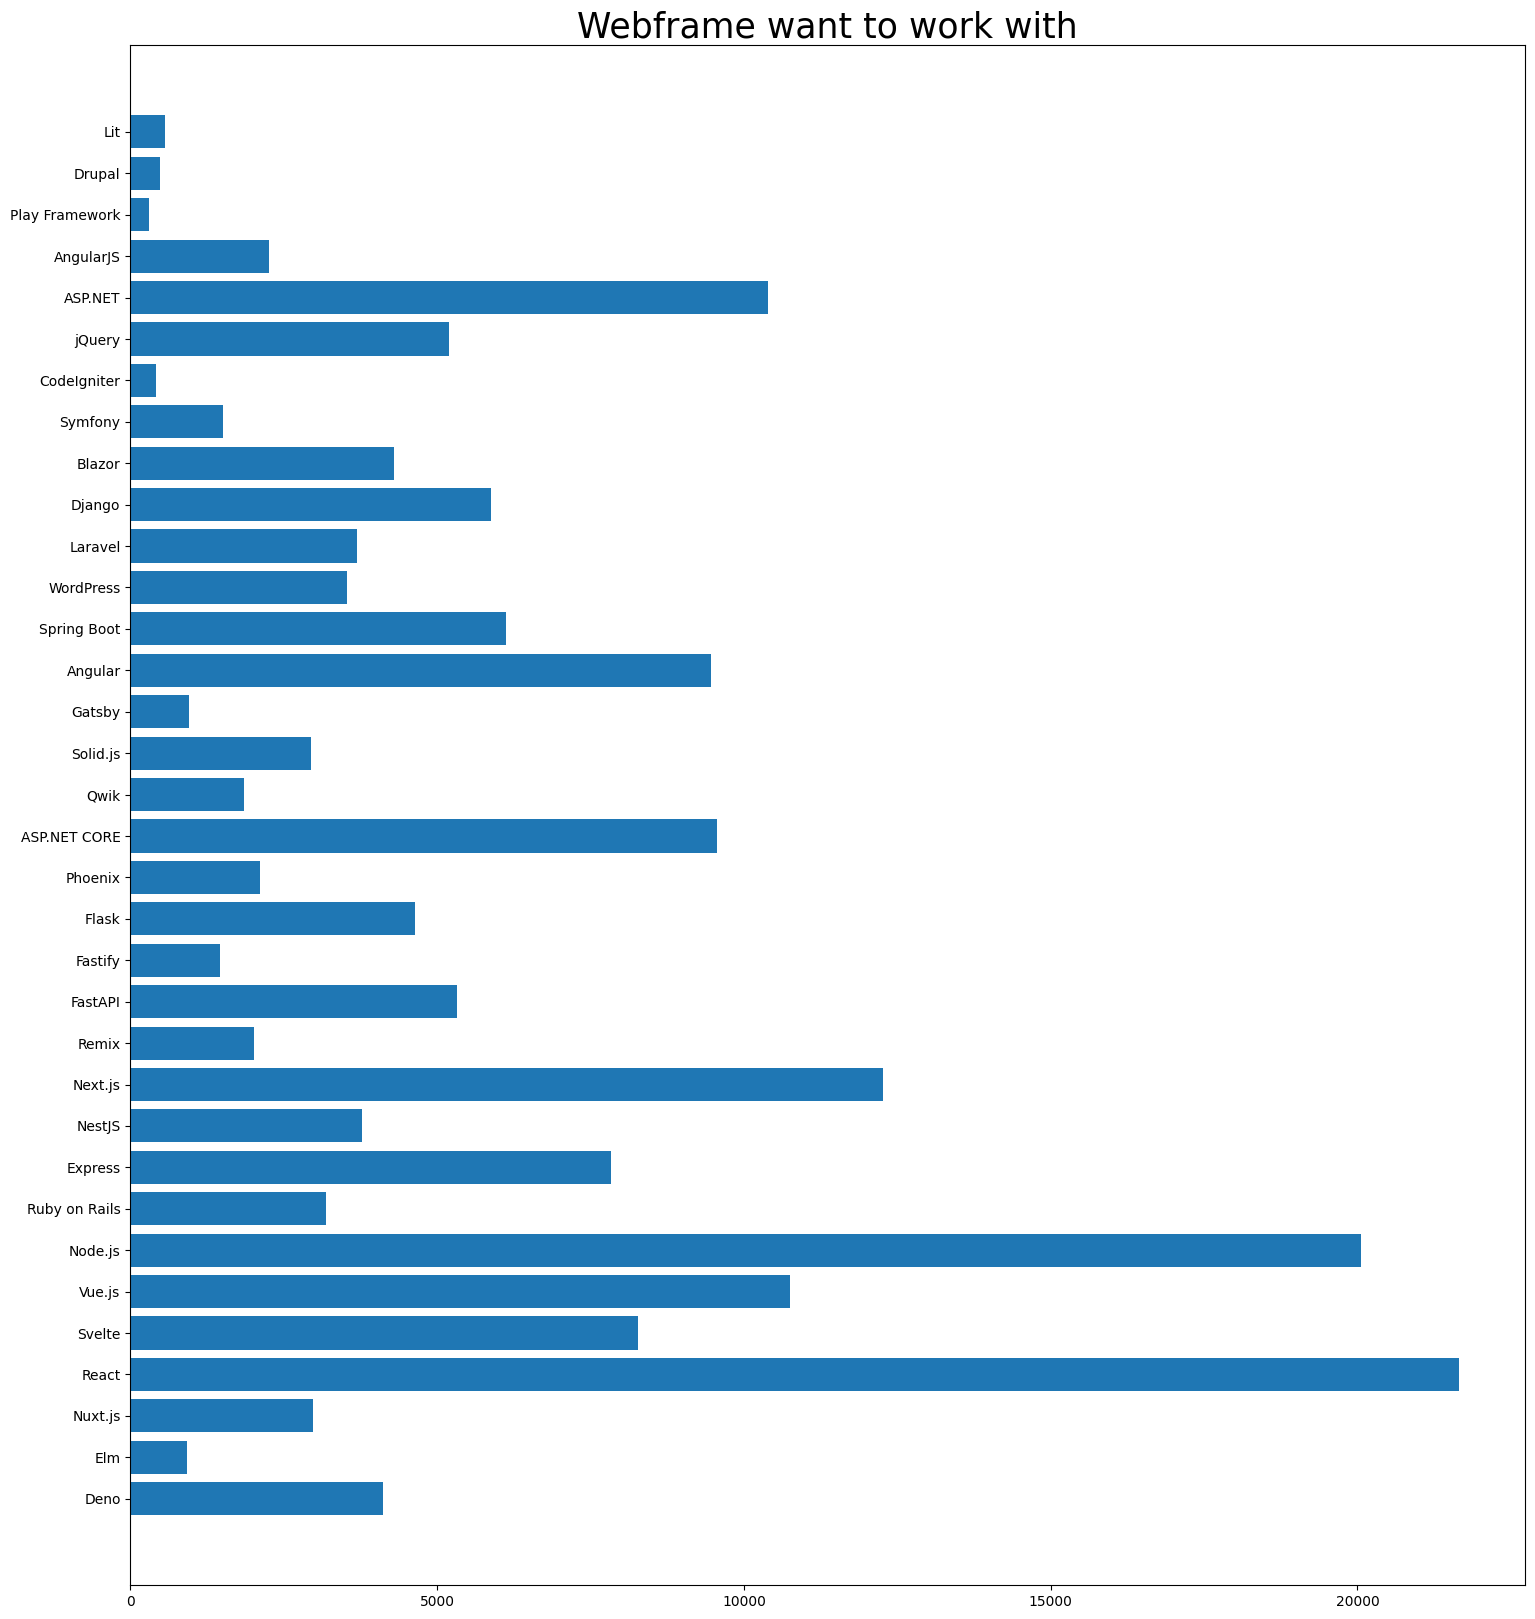

In [73]:
All_Webframe_want = Data["WebframeWantToWorkWith"].tolist()

webframe_want= seperate(All_Webframe_want)
WebDict_want = {}
for i in webframe_want:
    WebDict_want[i] = Data["WebframeWantToWorkWith"].str.contains(i, na=False).sum()



plt.barh(list(WebDict_want.keys()), list(WebDict_want.values()),align='center')
plt.title('Webframe want to work with', fontsize = 25)

In [74]:
new = Data.groupby(['Country'])['Country'].count()
new= pd.DataFrame(new)
new = new.rename(columns={'Country': 'Count'})
new=new.reset_index()
new[new['Count']== new['Count'].max()]



,Country,Count
176,United States of America,16735


In [83]:
salary = Data[(Data["Country"]=="United States of America")  & (Data["WorkExp"]<=1)][["DevType","CompTotal"]].sort_values(by=['CompTotal'],ascending=False)
salary.head(10)

,DevType,CompTotal
69005,"Developer, back-end",400000.00
35727,Data scientist or machine learning specialist,300000.00
70957,Hardware Engineer,250000.00
75879,Security professional,250000.00
36585,Other (please specify):,238000.00
10386,Developer Experience,230000.00
28538,Security professional,225000.00
86961,"Developer, desktop or enterprise applications",220000.00
3868,"Developer, back-end",220000.00
74868,"Developer, full-stack",206000.00


In [86]:
salary_grouped = salary.groupby(["DevType"])
salary = salary_grouped['CompTotal'].mean()


In [88]:
salary_Data = pd.DataFrame(salary).reset_index()
salary_Data.sort_values(by=['CompTotal'],ascending=False).head(10)

,DevType,CompTotal
7,Developer Experience,230000.00
26,Security professional,188666.67
14,"Developer, game or graphics",155000.00
20,Hardware Engineer,137800.00
2,Cloud infrastructure engineer,137645.00
4,Data scientist or machine learning specialist,134250.00
9,"Developer, back-end",116746.15
24,Research & Development role,114666.67
17,"Engineer, data",113333.33
22,Other (please specify):,109048.18


**AI Review**

In [78]:
AI = Data.groupby(['AISent'])['AISent'].count()
AI = pd.DataFrame(AI)
AI = AI.rename(columns={'AISent': 'Count'}).reset_index()
AI

,AISent,Count
0,Favorable,25966
1,Indifferent,8936
2,Unfavorable,1506
3,Unsure,2112
4,Very favorable,15001
5,Very unfavorable,231


In [79]:
# palette_color = sns.color_palette('bright')
# plt.rcParams["figure.figsize"] = (5, 5)
# plt.pie(AI['Count'].to_list(), labels=AI['AISent'].to_list(), colors=palette_color, autopct='%.0f%%') 

# plt.show()  

In [80]:
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
]

fig = go.Figure(
    data=[
        go.Pie(
            labels=AI['AISent'].to_list(),
            values=AI['Count'].to_list(),
            
            pull=[0.2, 0.1, 0.1, 0.1, 0.1, 0.1],
            
            marker_colors=earth_colors,
        )
    ]
)

fig.update_layout(title_text="Is AI Favorable?")

fig.show()

In [81]:

branch = Data.groupby(['MainBranch', 'AISelect'])['AISelect'].count()
branch = pd.DataFrame(branch)
branch = branch.rename(columns={'AISelect': 'Count'}).reset_index()

fig = px.bar(branch, x="AISelect", y="Count", color="MainBranch", text_auto=True)
fig.update_layout(title_text=" Do people currently use AI tools in their development process? ")
fig.show()
# fig = px.histogram(branch, x="AISelect", y="Count",
#              color="MainBranch", barmode='group',
#              histfunc='avg',
#              height=400)
# fig.show()

In [82]:
# status= data[data["AISelect"]=="Yes"][["Employment","AISelect"]]
# status = pd.DataFrame(status)
# status["Employment"].apply(lambda x: "UnEmployed" if "Not employed" in x else x)

Data[Data['Employment'].str.contains('Not employed, but looking for work;E')][['Employment']]

,Employment
105,"Not employed, but looking for work;Employed, p..."
1273,"Independent contractor, freelancer, or self-em..."
1952,"Independent contractor, freelancer, or self-em..."
2709,"Not employed, but looking for work;Employed, p..."
4221,"Not employed, but looking for work;Employed, p..."
...,...
84145,"Employed, full-time;Independent contractor, fr..."
84810,"Not employed, but looking for work;Employed, p..."
84887,"Independent contractor, freelancer, or self-em..."
85991,"Independent contractor, freelancer, or self-em..."
